<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/SpectralClustering_data_cleaned_without_avgcolumns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns

# Descarga de Datos

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv', delimiter=';')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv', delimiter=';')

# Preprocesado de Datos

In [3]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [4]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

# Crear matriz de características (feature matrix)

In [5]:
# Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

# Aplicar el algoritmo de clustering espectral

In [ ]:
# Experimentar con diferentes configuraciones para obtener resultados óptimos:

#0. Calcular la matriz de afinidad según distancia euclideana (A) o RBF (B)

#1. n_clusters: Este parámetro determina el número de clusters que se deben generar.
#    Probar diferentes valores para encontrar el número óptimo de clusters en los datos. Usar
#2. assign_labels: Este parámetro determina cómo se asignan las etiquetas a los clusters.
#   'kmeans' para utilizar el algoritmo K-means o
#   'discretize' para discretizar los valores propios (eigenvalues) de la matriz de afinidad.
#3. random_state: Este parámetro controla la reproducibilidad de los resultados.
#    Fijar un valor específico para obtener los mismos resultados cada vez que se ejecute el algoritmo.

#Además,se ajustarán otros parámetros según las necesidades:

#gamma: Si se utiliza una matriz de afinidad basada en RBF, se puede ajustar el valor de gamma para controlar la escala de la función de base radial.
#Un valor más alto de gamma puede llevar a una asignación más precisa, pero también puede hacer que el algoritmo sea más sensible al ruido.

#eigen_solver: Este parámetro controla el algoritmo utilizado para calcular los valores y vectores propios (eigenvalues y eigenvectors)
#de la matriz de afinidad. Probar diferentes opciones, como 'arpack' o 'lobpcg', para obtener resultados diferentes.


# A) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando la DISTANCIA EUCLIDEANA

In [ ]:
#utilizar la función pairwise_distances de scikit-learn para calcular la matriz de afinidad utilizando la distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

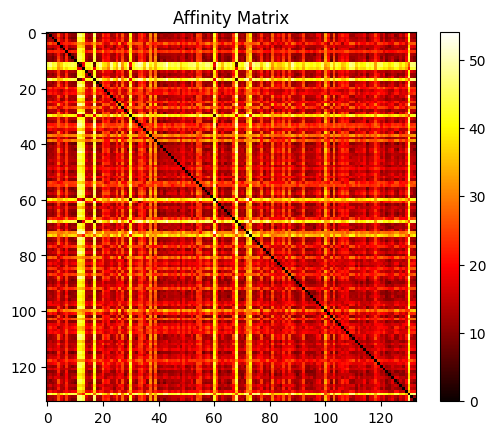

In [ ]:
#Visualización de matriz de similitud
#Esto puede proporcionar información sobre las relaciones de similitud entre las muestras
plt.imshow(affinity_matrix_euclidean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Affinity Matrix')
plt.show()

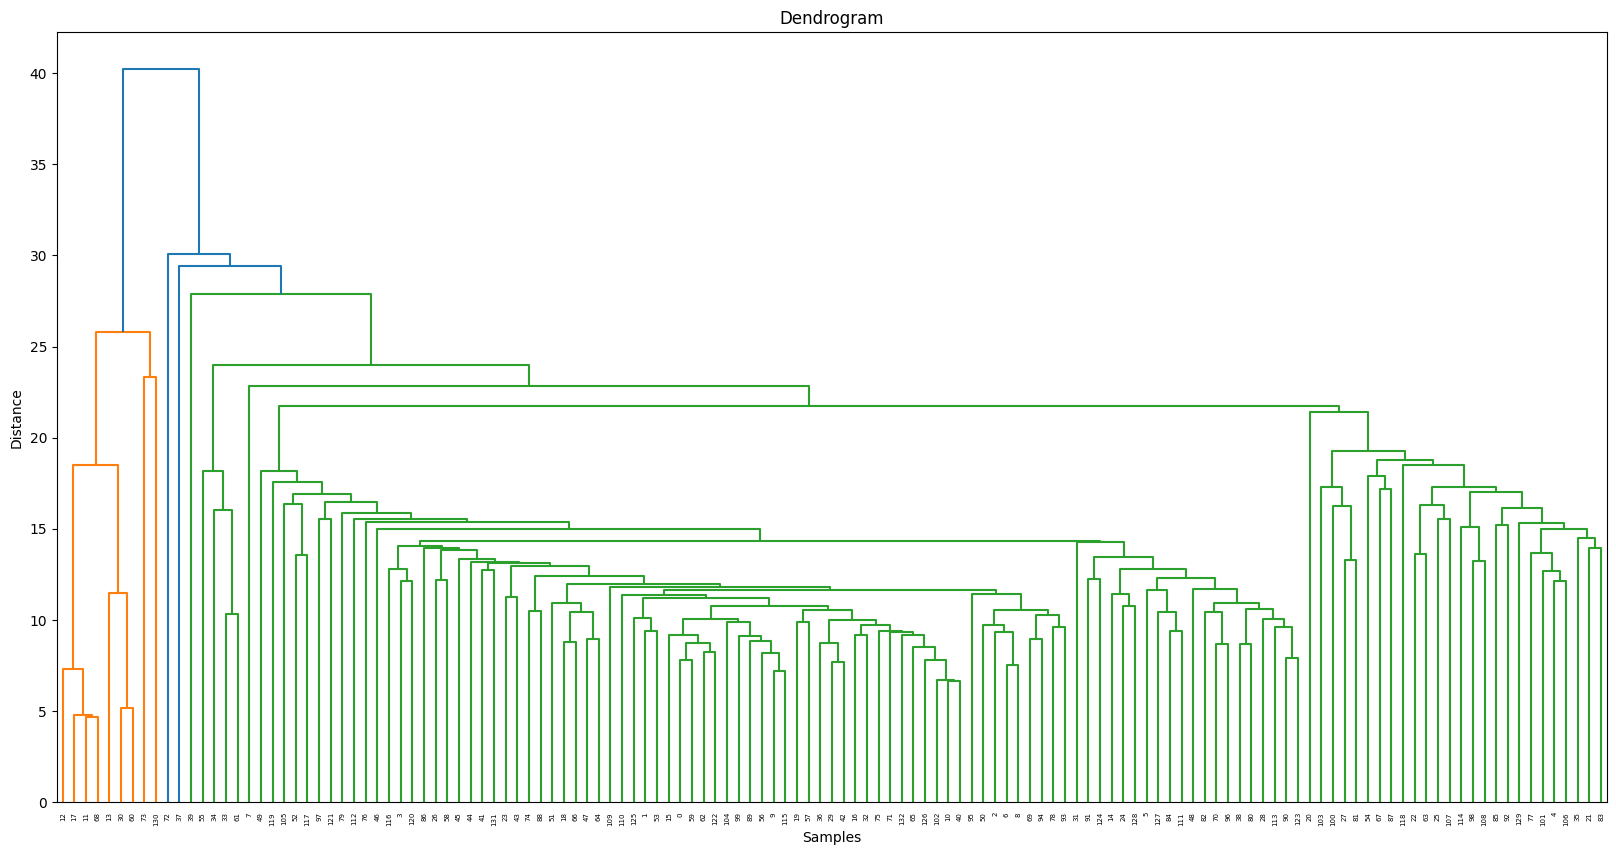

In [ ]:
#Visualización de gráfico de dendrograma

# Calcular la matriz de enlace jerárquico
Z = linkage(X, method='average', metric='euclidean')

# Dibujar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## A.1) matriz de afinidad=distancia euclidiana y assign_labels=discretize

## A.1.1) Clustering1: matriz de afinidad euclideana - discretize - n_clusters=4

In [ ]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering1 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels1 = spectral_clustering1.fit_predict(affinity_matrix_euclidean)
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
data_processed['Cluster']=labels1
data_processed

V1   V2   V3  SA1  SA2  SA3  SI0  SI1  SI2  SP1  ...  EQUIPO_rflidbinih  \
0    5.0  4.0  4.0  5.0  5.0  5.0  4.0  5.0  5.0  4.0  ...                  0   
1    4.0  5.0  3.0  5.0  5.0  5.0  4.0  5.0  6.0  2.0  ...                  0   
2    5.0  4.0  5.0  4.0  4.0  4.0  4.0  5.0  5.0  3.0  ...                  0   
3    5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  4.0  ...                  0   
4    2.0  2.0  2.0  1.0  1.0  1.0  4.0  5.0  5.0  1.0  ...                  0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...                ...   
128  4.0  4.0  4.0  5.0  4.0  5.0  2.0  4.0  4.0  2.0  ...                  0   
129  2.0  3.0  4.0  5.0  4.0  4.0  3.0  6.0  4.0  1.0  ...                  0   
130 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...                  0   
131  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...                  0   
132  6.0  5.0  5.0  5.0  5.0  5.0  5.0  6.0  5.0  6.0  ...                  0   

     EDAD_ijawrgtfuz  EDAD_omygfsbzgq  EDAD_pqgwhrmfdu  EDAD_qmsudmubli  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                1                0                0   
3                  0                0                1                0   
4                  0                0                1                0   
..               ...              ...              ...              ...   
128                0                0                0                1   
129                0                0                0                1   
130                0                0                0                1   
131                0                0                0                1   
132                0                0                0                1   

     EDAD_vjekcogdhn  GENERO_Femenino  GENERO_Masculino  GENERO_No binario  \
0                  0                0                 1                  0   
1                  0                0                 1                  0   
2                  0                1                 0                  0   
3                  0                0                 1                  0   
4                  0                0                 1                  0   
..               ...              ...               ...                ...   
128                0                0                 0                  0   
129                0                0                 0                  0   
130                0                0                 0                  0   
131                0                0                 0                  0   
132                0                0                 0                  0   

     Cluster  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
128        0  
129        0  
130        0  
131        0  
132        0  

[133 rows x 127 columns]

In [ ]:
data_processed.to_csv("spectralClusteringLabels1_without_avgcolumns.csv", sep=";", index=False)

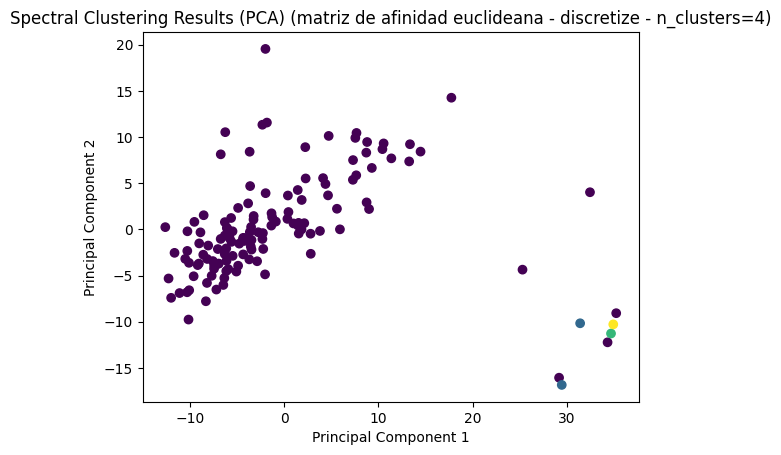

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

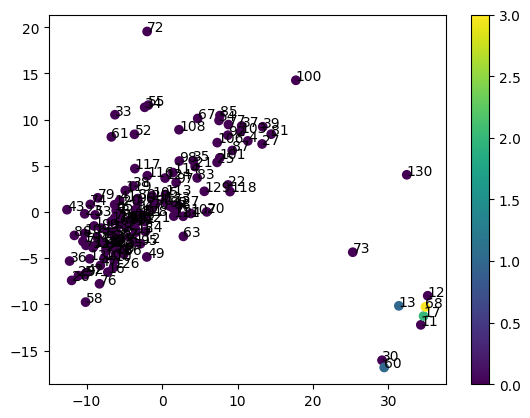

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels1):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances, silhouette_score, silhouette_samples
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels1)
silhouette_avg

0.4586695152458339

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels1)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels1))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels1 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")


Índice de Silueta del Clúster 0: 0.46823945433214215
Índice de Silueta del Clúster 1: 0.3000779594247799
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0


In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering1.n_clusters):

    cluster_indices = np.where(labels1 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")




Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 7: SI0 (Media: 4.5)
- Atributo n. 8: SI1 (Media: 5.0)
Cluster 3:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 3.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)


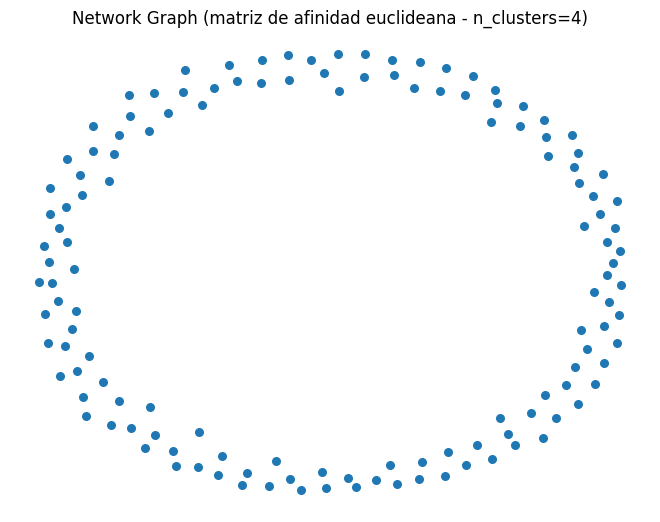

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


## A.1.2) Clustering2:  matriz de afinidad euclideana - discretize - n_clusters=97

In [ ]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering2 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels2 = spectral_clustering2.fit_predict(affinity_matrix_euclidean)
labels2

array([78, 71, 25, 65, 41, 90, 55, 89, 34, 42, 43, 38, 48, 32, 46, 19, 67,
       20, 56, 64, 58, 23, 65, 89, 70, 23, 33, 15, 58, 73, 61, 68, 26, 79,
       53, 53, 62,  7, 66, 13, 16, 13, 12, 11, 50, 27, 65,  7, 75, 11, 92,
       80, 36, 69, 74, 56, 18, 51,  0, 47,  8,  9,  3, 86, 28, 59, 39, 49,
        4, 84, 10, 22, 53, 53, 77,  5, 39,  1, 50, 30,  2, 44, 96, 49, 30,
       91, 81, 39, 72, 54, 31,  7, 75, 37, 46, 71, 40, 17, 81, 86, 87, 85,
       35, 65, 45, 39, 27, 63, 63, 56, 60, 57, 68, 14, 72,  6, 17, 63, 77,
       90, 68, 88, 33, 29, 83, 74, 24, 81, 21, 39, 17, 84, 52])

In [ ]:
data_processed['Cluster']=labels2
data_processed

V1   V2   V3  SA1  SA2  SA3  SI0  SI1  SI2  SP1  ...  EQUIPO_rflidbinih  \
0    5.0  4.0  4.0  5.0  5.0  5.0  4.0  5.0  5.0  4.0  ...                  0   
1    4.0  5.0  3.0  5.0  5.0  5.0  4.0  5.0  6.0  2.0  ...                  0   
2    5.0  4.0  5.0  4.0  4.0  4.0  4.0  5.0  5.0  3.0  ...                  0   
3    5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  4.0  ...                  0   
4    2.0  2.0  2.0  1.0  1.0  1.0  4.0  5.0  5.0  1.0  ...                  0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...                ...   
128  4.0  4.0  4.0  5.0  4.0  5.0  2.0  4.0  4.0  2.0  ...                  0   
129  2.0  3.0  4.0  5.0  4.0  4.0  3.0  6.0  4.0  1.0  ...                  0   
130 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...                  0   
131  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...                  0   
132  6.0  5.0  5.0  5.0  5.0  5.0  5.0  6.0  5.0  6.0  ...                  0   

     EDAD_ijawrgtfuz  EDAD_omygfsbzgq  EDAD_pqgwhrmfdu  EDAD_qmsudmubli  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                1                0                0   
3                  0                0                1                0   
4                  0                0                1                0   
..               ...              ...              ...              ...   
128                0                0                0                1   
129                0                0                0                1   
130                0                0                0                1   
131                0                0                0                1   
132                0                0                0                1   

     EDAD_vjekcogdhn  GENERO_Femenino  GENERO_Masculino  GENERO_No binario  \
0                  0                0                 1                  0   
1                  0                0                 1                  0   
2                  0                1                 0                  0   
3                  0                0                 1                  0   
4                  0                0                 1                  0   
..               ...              ...               ...                ...   
128                0                0                 0                  0   
129                0                0                 0                  0   
130                0                0                 0                  0   
131                0                0                 0                  0   
132                0                0                 0                  0   

     Cluster  
0         37  
1         68  
2         83  
3         66  
4         88  
..       ...  
128       59  
129       77  
130       47  
131       71  
132       11  

[133 rows x 127 columns]

In [ ]:
data_processed.to_csv("spectralClusteringLabels2_xxx.csv", sep=";", index=False)

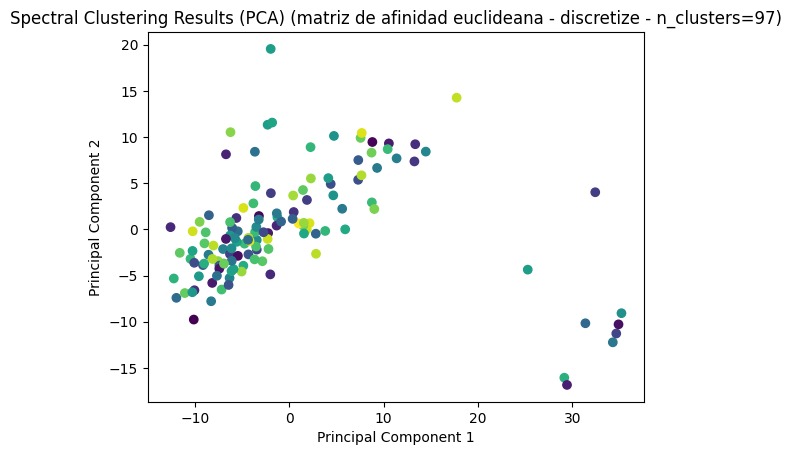

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels2)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

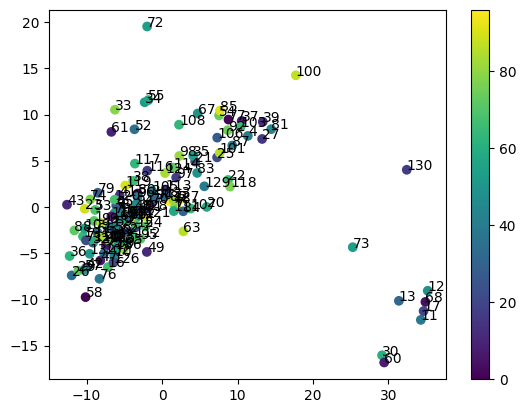

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels2):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels2)
silhouette_avg

-0.20809748958281188

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels2)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels2))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels2 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")


Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: -0.4933636392775791
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: -0.3701006685224856
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: -0.5054684783856036
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: -0.5118052344322236
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: -0.25308567797261894
Índice de Silueta

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering2.n_clusters):

    cluster_indices = np.where(labels2 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")


Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 16: CL1 (Media: 3.798449612403101)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 18: CL3 (Media: -1.0)
Cluster 5:
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 15: SF3 (Media: nan)
- Atributo n. 13: SF1 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 

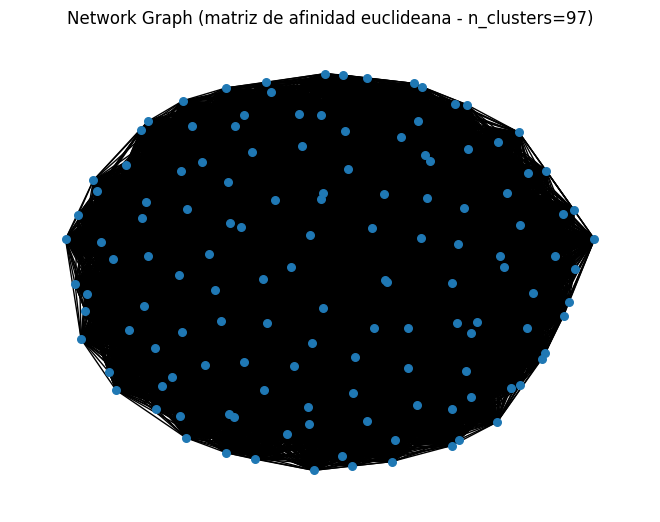

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.1.3) Clustering3:  matriz de afinidad euclideana - discretize - n_clusters=27

In [ ]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 27 áreas
spectral_clustering3 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels3 = spectral_clustering3.fit_predict(affinity_matrix_euclidean)
labels3

array([24, 17,  0,  8, 26, 10, 26,  1, 18, 13, 12, 14,  2, 13,  6, 26,  3,
       19, 24, 12,  1, 21, 10, 21, 26,  1,  3, 26, 10, 11, 20, 11,  8,  4,
        1,  1, 22,  1,  0,  1,  0,  7, 13, 23, 10,  8, 10, 21,  1,  1,  1,
        7,  1,  0, 10,  1, 16,  6,  0, 17,  5,  1,  7, 21,  6, 26, 18,  1,
        9, 22, 12,  0,  1,  1, 24, 25, 10,  1, 25,  6, 10,  1, 18,  1, 17,
        1,  6,  1,  1,  7, 10, 16,  1, 16,  3, 16, 21, 13,  1, 23,  1,  1,
       23, 26,  0,  1,  1,  1, 21,  1,  7, 21,  1,  6, 10, 15,  4, 10,  1,
        1, 21,  4,  6, 21, 18, 24,  3, 21, 15,  1,  5,  0, 17])

In [ ]:
data_processed['Cluster']=labels3
data_processed

V1   V2   V3  SA1  SA2  SA3  SI0  SI1  SI2  SP1  ...  EQUIPO_rflidbinih  \
0    5.0  4.0  4.0  5.0  5.0  5.0  4.0  5.0  5.0  4.0  ...                  0   
1    4.0  5.0  3.0  5.0  5.0  5.0  4.0  5.0  6.0  2.0  ...                  0   
2    5.0  4.0  5.0  4.0  4.0  4.0  4.0  5.0  5.0  3.0  ...                  0   
3    5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  4.0  ...                  0   
4    2.0  2.0  2.0  1.0  1.0  1.0  4.0  5.0  5.0  1.0  ...                  0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...                ...   
128  4.0  4.0  4.0  5.0  4.0  5.0  2.0  4.0  4.0  2.0  ...                  0   
129  2.0  3.0  4.0  5.0  4.0  4.0  3.0  6.0  4.0  1.0  ...                  0   
130 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ...                  0   
131  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...                  0   
132  6.0  5.0  5.0  5.0  5.0  5.0  5.0  6.0  5.0  6.0  ...                  0   

     EDAD_ijawrgtfuz  EDAD_omygfsbzgq  EDAD_pqgwhrmfdu  EDAD_qmsudmubli  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                1                0                0   
3                  0                0                1                0   
4                  0                0                1                0   
..               ...              ...              ...              ...   
128                0                0                0                1   
129                0                0                0                1   
130                0                0                0                1   
131                0                0                0                1   
132                0                0                0                1   

     EDAD_vjekcogdhn  GENERO_Femenino  GENERO_Masculino  GENERO_No binario  \
0                  0                0                 1                  0   
1                  0                0                 1                  0   
2                  0                1                 0                  0   
3                  0                0                 1                  0   
4                  0                0                 1                  0   
..               ...              ...               ...                ...   
128                0                0                 0                  0   
129                0                0                 0                  0   
130                0                0                 0                  0   
131                0                0                 0                  0   
132                0                0                 0                  0   

     Cluster  
0         12  
1         17  
2         23  
3         17  
4         18  
..       ...  
128       23  
129       11  
130       16  
131       24  
132       17  

[133 rows x 127 columns]

In [ ]:
data_processed.to_csv("spectralClusteringLabels3_xxx.csv", sep=";", index=False)

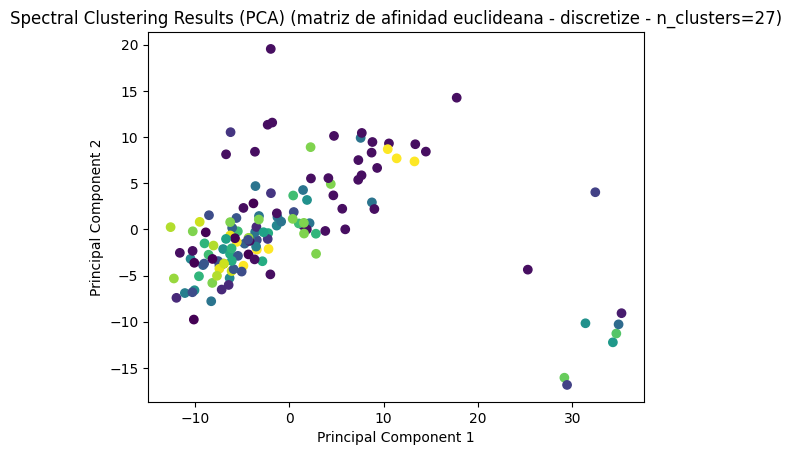

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

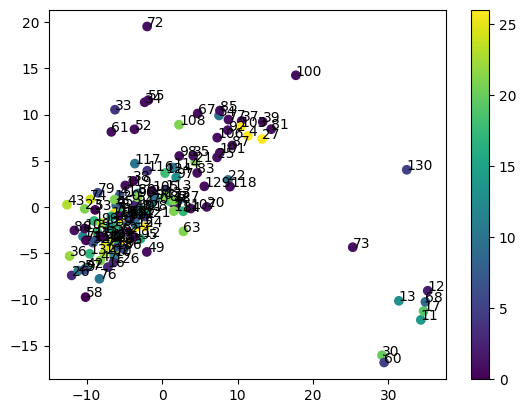

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels3):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels3)
silhouette_avg

-0.18259635541995836

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels3)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels3))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels3 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.1260546225521293
Índice de Silueta del Clúster 1: -0.20537691769697883
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: -0.14691647877069242
Índice de Silueta del Clúster 4: -0.22763545537373664
Índice de Silueta del Clúster 5: -0.4195849459730424
Índice de Silueta del Clúster 6: -0.19438683290687733
Índice de Silueta del Clúster 7: -0.1426517397596111
Índice de Silueta del Clúster 8: -0.1714796759589198
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: -0.14880579622849288
Índice de Silueta del Clúster 11: -0.17575275152174225
Índice de Silueta del Clúster 12: -0.16994497253150223
Índice de Silueta del Clúster 13: -0.5633296541539312
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: -0.12136172256687382
Índice de Silueta del Clúster 16: -0.0975793198271021
Índice de Silueta del Clúster 17: -0.19058142778582254
Índice de Silueta del Clúster 18: -0.14863521924461756
Índice de Silueta del 

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering3.n_clusters):

    cluster_indices = np.where(labels3 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 15: SF3 (Media: 3.449612403100775)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 3.5)
Cluster 3:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 3.0)
- Atributo n. 29: CD2 (Media: -1.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 13: SF1 (Media: 4.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 15: SF3 (Media: nan)
- Atributo n. 13: SF1 (Media: nan)
- Atributo n. 8: SI1 (Media: nan)
Cluster 6:
- Atributo n. 4: S

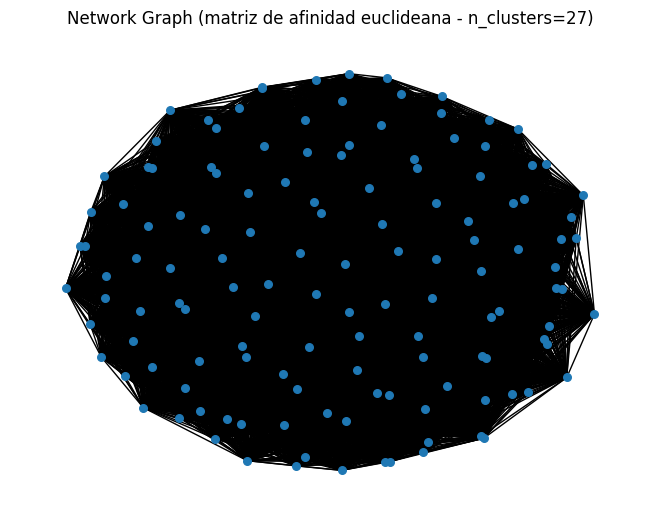

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=27)')
plt.show()

## A.2) matriz de afinidad=distancia euclidiana y assign_labels=kmeans

## A.2.1) Clustering4:  matriz de afinidad euclideana - kmeans - n_clusters=4

In [ ]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering4 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels4 = spectral_clustering4.fit_predict(affinity_matrix_euclidean)
labels4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [ ]:
data_processed['Cluster']=labels4
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels4_data_cleaned.csv", sep=";", index=False)

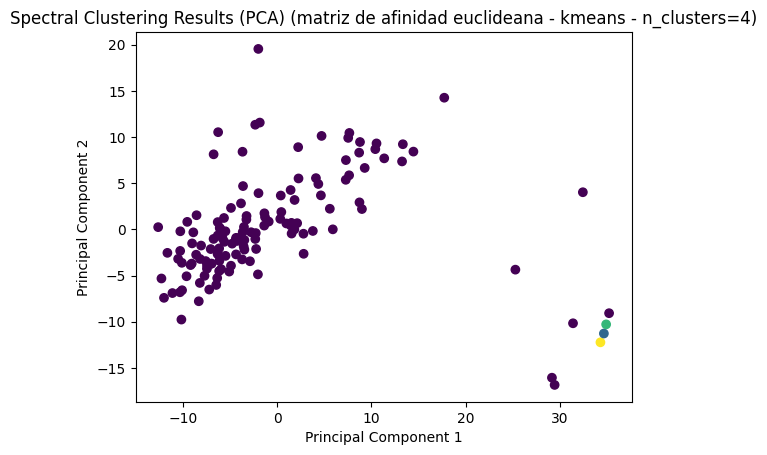

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels4)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels4)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

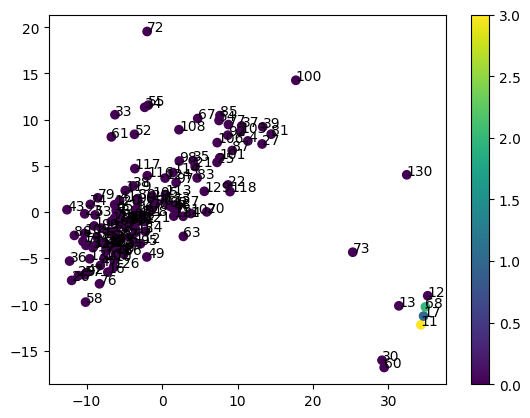

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels4):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels4)
silhouette_avg

0.4803986839215844

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels4)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels4))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels4 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.4914848073966978
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0


In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering4.n_clusters):

    cluster_indices = np.where(labels4 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 13: SF1 (Media: 3.5)
- Atributo n. 15: SF3 (Media: 4.5)
Cluster 3:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 3.0)
- Atributo n. 13: SF1 (Media: 4.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)


## A.2.2) Clustering5:  matriz de afinidad euclideana - kmeans - n_clusters=97

In [ ]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering5 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels5 = spectral_clustering5.fit_predict(affinity_matrix_euclidean)
labels5

array([16, 89,  7,  8, 85, 82, 49, 61, 22, 14, 38,  8,  8,  8, 41,  2, 31,
        8, 44, 58,  8, 90,  8, 50, 48, 61, 95,  8,  9, 74,  8, 96, 13, 27,
        8,  8, 24, 27, 62, 12,  3, 92, 42, 79, 65, 33, 12, 87, 75, 12, 20,
       45, 84, 34,  8, 61, 17, 57, 43, 32,  8, 12,  6, 91, 68, 37, 23, 61,
        8, 35, 11, 60,  8,  8, 71, 21,  8,  8, 63, 73,  4, 94, 80, 93, 40,
       61,  8, 27, 64, 29, 15, 52, 12, 18, 47, 54,  5, 83, 72, 10, 61, 77,
       25,  8, 59, 27, 78, 27, 88, 70, 51, 53, 61, 46,  8,  0, 67, 12, 81,
       69, 36, 86, 28, 66, 56, 39, 19, 76, 26,  8,  1, 55, 30],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labels5
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels5_data_cleaned.csv", sep=";", index=False)

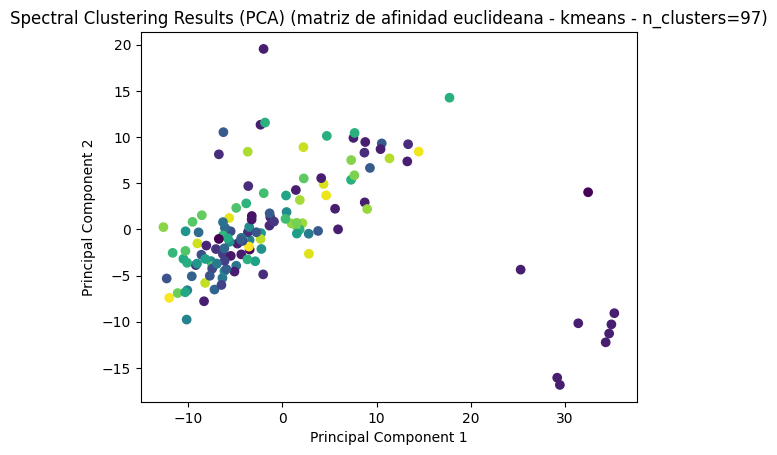

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

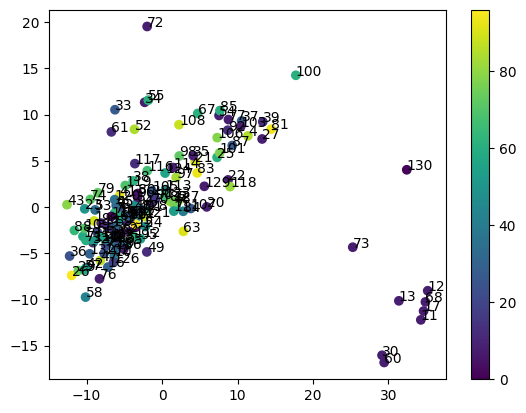

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels5):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels5)
silhouette_avg

-0.1113900626930548

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels5)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels5))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels5 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: -0.3681925281614543
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: -0.4108112846039793
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúste

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering5.n_clusters):

    cluster_indices = np.where(labels5 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 15: SF3 (Media: 3.449612403100775)
Cluster 2:
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 6: SA3 (Media: 4.0)
- Atributo n. 9: SI2 (Media: 5.5)
- Atributo n. 5: SA2 (Media: 3.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 13: SF1 (Media: nan)
- Atributo n. 5: SA2 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 (M

## A.2.3) Clustering6: matriz de afinidad euclideana - kmeans - n_clusters=27

In [ ]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering6 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels6 = spectral_clustering6.fit_predict(affinity_matrix_euclidean)
labels6

array([ 8,  1,  0,  2,  2,  2,  1,  2, 25, 14, 15,  9, 18,  2,  2, 20,  2,
       26,  5, 20,  2, 20,  2,  2, 20,  2,  1,  2,  2, 19,  2,  2,  7, 20,
        2,  2, 12,  2,  2,  2,  6,  2, 13,  2,  2,  2,  2, 20,  2,  2,  2,
        2,  2, 24,  2,  2,  1, 23,  0,  5,  2,  2,  1, 20,  2, 17,  2,  2,
        2,  5,  2,  3,  2,  2,  1,  0,  2,  2, 17,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 16,  1,  2, 21,  2,  5, 20,  2,  2,  1,  2,  2,
       11,  2,  2,  2,  2,  2,  2, 20,  2, 20,  2,  2,  2, 10, 20,  2,  2,
        2, 20,  2,  4, 20,  2, 20, 22, 20,  0,  2,  2,  2,  1],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labels6
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels6_data_cleaned.csv", sep=";", index=False)

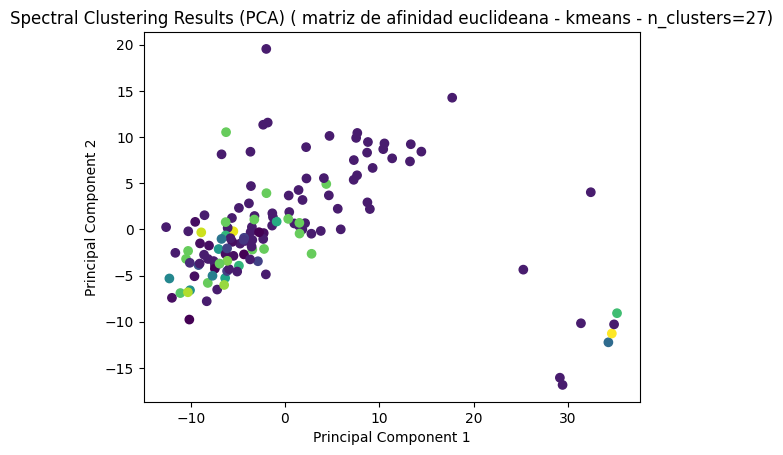

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels6)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

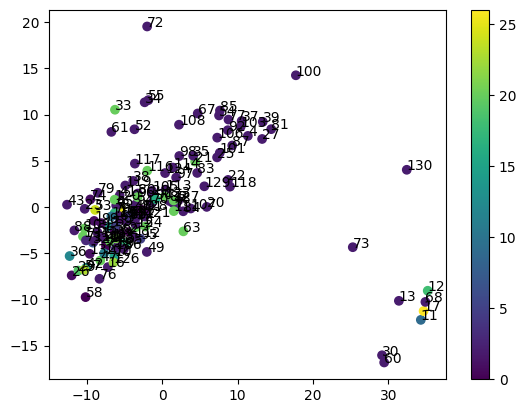

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels6):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labels6)
silhouette_avg

-0.2834875510158348

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labels6)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labels6))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labels6 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.3098891918324839
Índice de Silueta del Clúster 1: -0.28869493468876467
Índice de Silueta del Clúster 2: -0.354399466142591
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: -0.2603994805215007
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: -0.29309655817956737
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: -0.3063389138673317
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Í

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering6.n_clusters):

    cluster_indices = np.where(labels6 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 3.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 3.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 8: SI1 (Media: 5.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 13: SF1 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 (M

# B) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando RBF

In [ ]:
affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)  #se recomienda probar diferentes valores de gamma en un rango amplio, como [0.001, 0.01, 0.1, 1, 10]

# B.1)  matriz de afinidad=RBF y assign_labels=discretize

## B.1.1) Clustering7: matriz de afinidad RBF - discretize - n_clusters=4

In [ ]:
n_clusters = 4
spectral_clustering7 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_7 = spectral_clustering7.fit_predict(affinity_matrix_rbf)
labelsRBF_7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0])

In [ ]:
data_processed['Cluster']=labelsRBF_7
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels7_data_cleaned.csv", sep=";", index=False)

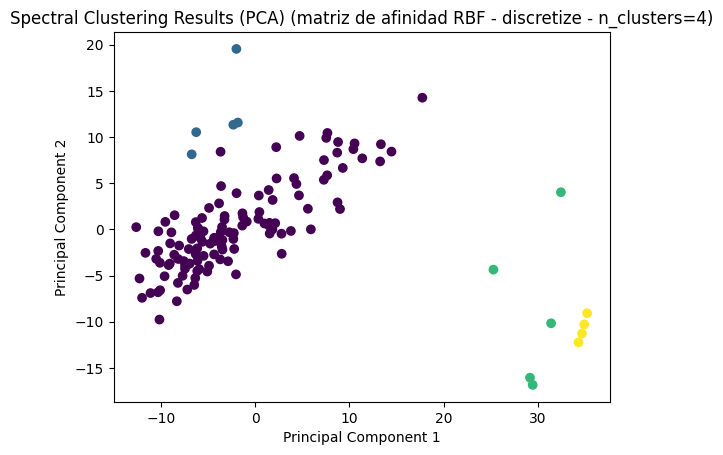

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_7)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=4)')
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels    plt.show()

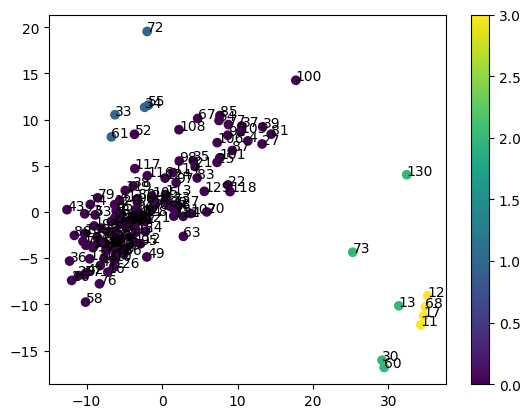

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_7):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_7)
silhouette_avg

0.3211443960554583

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_7)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_7))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_7 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.3199740272306373
Índice de Silueta del Clúster 1: 0.2104542357496154
Índice de Silueta del Clúster 2: 0.13401015985697776
Índice de Silueta del Clúster 3: 0.7282433642242887


In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering7.n_clusters):

    cluster_indices = np.where(labelsRBF_7 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 15: SF3 (Media: 4.5)
Cluster 3:
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)


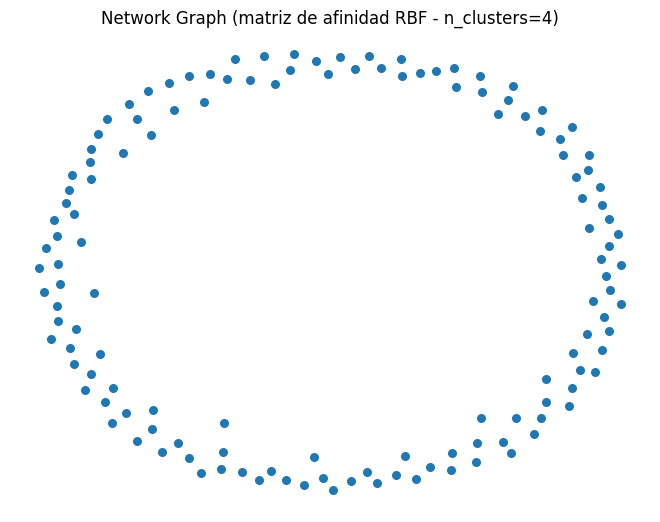

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=4)')
plt.show()


## B.1.2) Clustering8: matriz de afinidad RBF - discretize - n_clusters=97

In [ ]:
n_clusters = 97
spectral_clustering8 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_8 = spectral_clustering8.fit_predict(affinity_matrix_rbf)
labelsRBF_8

array([ 1, 19,  0, 17,  8, 21,  0,  9,  0, 17,  0, 34,  7, 59, 11,  1,  0,
       34, 10,  0, 20, 21, 21, 22, 11, 58, 22, 72, 21, 36, 59, 11,  0, 16,
       16, 29, 36, 15, 41, 30,  0,  1, 36, 22,  1, 19, 19, 44, 21, 17, 29,
       10, 21, 19, 18, 16, 17,  0,  0,  1, 59, 16, 10, 20, 44, 19, 10,  6,
       34,  9, 76,  0,  3, 14, 27,  0,  0, 13, 29, 41, 41, 72, 21, 21, 20,
       18, 10,  5, 27, 17, 21, 19,  5, 10,  9, 19, 76,  9, 12, 17, 25, 13,
        0, 13, 17, 21,  8, 20, 12, 36, 13, 20, 76, 21, 20, 17, 29, 21,  2,
       11, 29,  9,  1, 21, 76, 19,  0, 20,  1, 76,  4, 17,  0])

In [ ]:
data_processed['Cluster']=labelsRBF_8
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels8_data_cleaned.csv", sep=";", index=False)

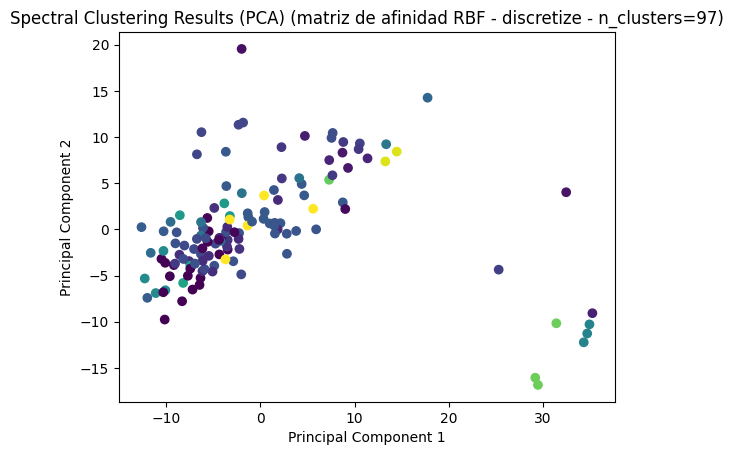

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

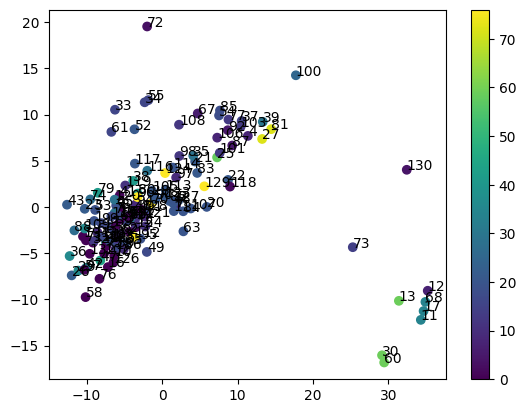

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_8):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_8)
silhouette_avg

0.01675760784156165

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_8)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_8))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_8 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.011086618703096698
Índice de Silueta del Clúster 1: 0.10150835899903209
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: -0.21884782566491498
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.1901539123412398
Índice de Silueta del Clúster 9: -0.07064850843620488
Índice de Silueta del Clúster 10: 0.011638136419012618
Índice de Silueta del Clúster 11: -0.026882792370230627
Índice de Silueta del Clúster 12: 0.17763252726080336
Índice de Silueta del Clúster 13: -0.29063633340604633
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.21177244553999217
Índice de Silueta del Clúster 17: -0.022956781491029032
Índice de Silueta del Clúster 18: -0.1474757603412848
Índice de Silueta del Clúster 19: -0.08836388358001936
Índice de Silueta del Clúster 20

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering8.n_clusters):

    cluster_indices = np.where(labelsRBF_8 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 3.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 6: SA3 (Media: 5.0)
- Atributo n. 9: SI2 (Media: 4.0)
- Atributo n. 11: SP2 (Media: 3.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 6: SA3 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
Cluster 5:
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 6: SA3 (Media: nan)
- Atributo n. 9: SI2 (Media: nan)
- Atributo n. 5: SA2 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 (M

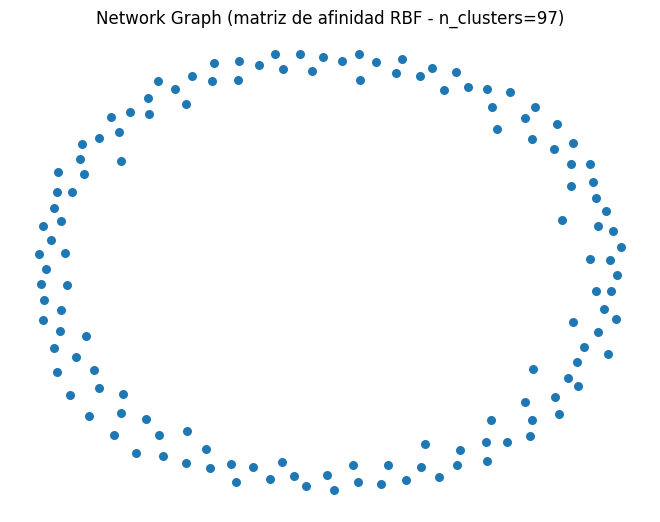

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=97)')
plt.show()

## B.1.3) Clustering9: matriz de afinidad RBF - discretize - n_clusters=27

In [ ]:
n_clusters = 27
spectral_clustering9 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_9 = spectral_clustering9.fit_predict(affinity_matrix_rbf)
labelsRBF_9

array([ 1, 11,  0,  9,  6, 19,  0, 14,  0,  9,  0, 26, 26,  8,  5,  1,  1,
       26,  2, 25,  3, 19, 19, 25,  5,  6, 12,  6, 19, 24,  8,  5,  1,  7,
        7,  3, 24, 19, 15,  4,  1,  1, 24, 25,  1,  1,  1,  2, 19,  9,  0,
        2, 19, 11,  4,  7,  9,  0,  0,  1,  8,  7,  2,  3,  2,  1,  2, 10,
       26, 14, 23,  0,  7,  8, 13,  1,  0,  4,  2, 15, 15,  6, 23, 19,  3,
        4,  2, 25, 13,  9, 19,  1,  6,  2, 14,  1, 23, 14, 10,  9,  6,  4,
        0,  4,  1, 19,  6,  3, 10, 24,  4,  3, 23, 19,  3,  9, 14, 19,  3,
        5,  0, 14,  1, 19, 23,  1,  1,  3,  2, 23,  8,  9,  0])

In [ ]:
data_processed['Cluster']=labelsRBF_9
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels9_data_cleaned.csv", sep=";", index=False)

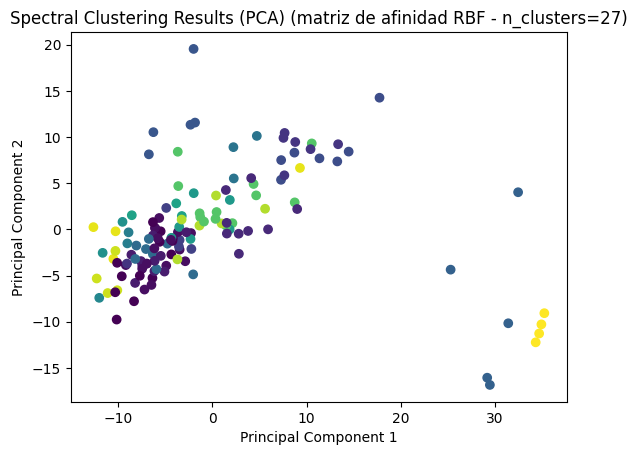

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_9)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_9)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - n_clusters=27)')
    plt.show()

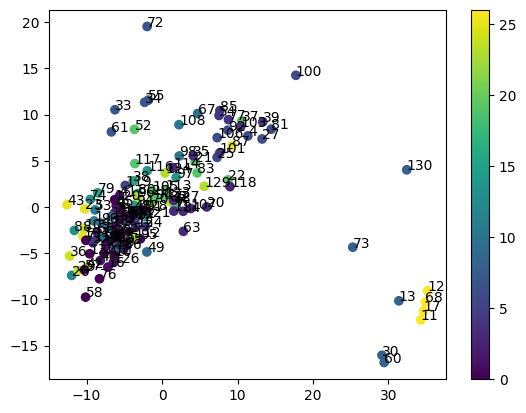

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_9):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_9)
silhouette_avg

0.02514643319725091

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_9)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_9))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_9 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.043751697265149915
Índice de Silueta del Clúster 1: -0.01300035007955068
Índice de Silueta del Clúster 2: 0.07334988115221679
Índice de Silueta del Clúster 3: 0.019718287613624604
Índice de Silueta del Clúster 4: -0.16793013356550918
Índice de Silueta del Clúster 5: -0.028147307733581886
Índice de Silueta del Clúster 6: 0.08880520185253024
Índice de Silueta del Clúster 7: 0.12960230278302393
Índice de Silueta del Clúster 8: 0.13401015985697776
Índice de Silueta del Clúster 9: -0.009451435592300463
Índice de Silueta del Clúster 10: 0.13890125497708053
Índice de Silueta del Clúster 11: 0.16922554528079092
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.09166651818273239
Índice de Silueta del Clúster 14: -0.07712597904685735
Índice de Silueta del Clúster 15: 0.13455070331210475
Índice de Silueta del Clúster 19: -0.057962639852472256
Índice de Silueta del Clúster 23: 0.028447933387569898
Índice de Silueta del Clúster 24: 0.16185

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering9.n_clusters):

    cluster_indices = np.where(labelsRBF_9 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 3.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 15: SF3 (Media: 3.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 3.0)
- Atributo n. 10: SP1 (Media: 3.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 7: SI0 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 (Me

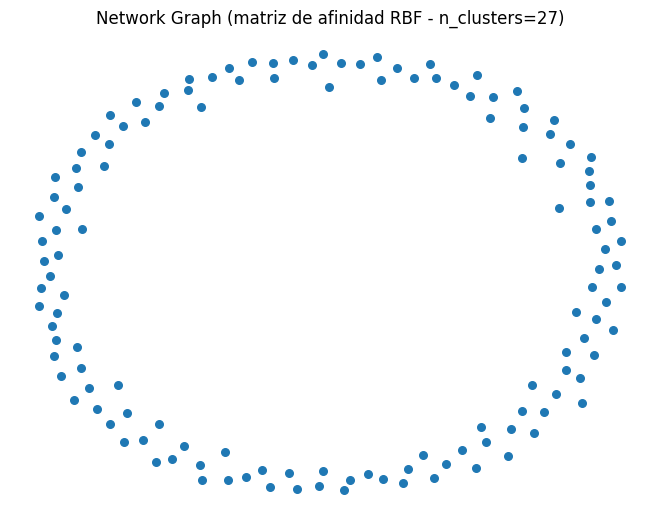

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 27

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=27)')
plt.show()

# B.2)  matriz de afinidad=RBF y assign_labels=kmeans

## B.2.1) Clustering10: matriz de afinidad RBF - kmeans - n_clusters=4

In [ ]:
n_clusters = 4
spectral_clustering10 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_10 = spectral_clustering10.fit_predict(affinity_matrix_rbf)
labelsRBF_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0], dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_10
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels10_data_cleaned.csv", sep=";", index=False)

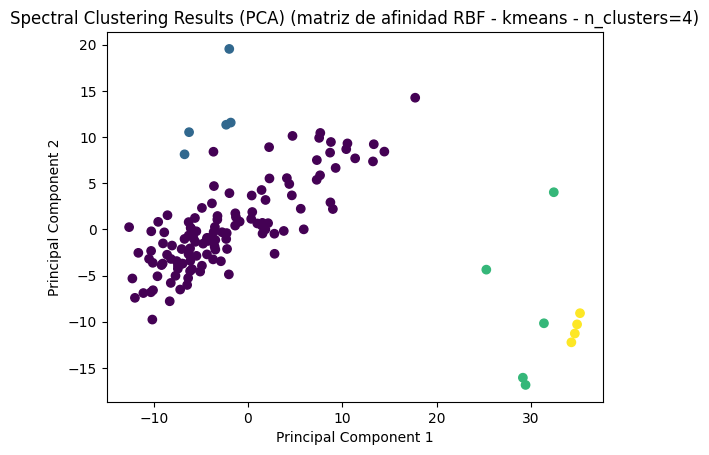

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_10)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

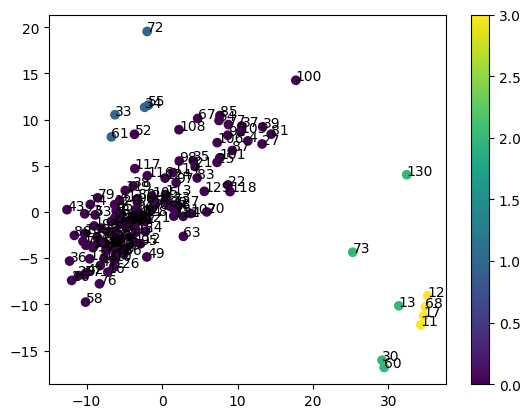

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_10):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_10)
silhouette_avg

0.3211443960554583

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_10)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_10))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_10 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.3199740272306373
Índice de Silueta del Clúster 1: 0.2104542357496154
Índice de Silueta del Clúster 2: 0.13401015985697776
Índice de Silueta del Clúster 3: 0.7282433642242887


In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering10.n_clusters):

    cluster_indices = np.where(labelsRBF_10 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 15: SF3 (Media: 4.5)
Cluster 3:
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)


## B.2.2) Clustering11: matriz de afinidad RBF - kmeans - n_clusters=97

In [ ]:
n_clusters = 97
spectral_clustering11 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_11 = spectral_clustering11.fit_predict(affinity_matrix_rbf)
labelsRBF_11

array([11, 92, 11, 49, 35, 69, 11,  8, 11, 11, 11, 11, 11, 48, 53, 96, 91,
       11, 89, 66,  6, 38, 28, 54, 64, 19, 67, 31, 78, 11, 11, 42, 11, 52,
       13, 29, 11,  1, 85,  5, 11, 58, 11, 57, 61, 50, 43, 79, 60, 16, 88,
       80, 22, 70, 14,  7, 11, 11, 72, 11, 11, 52, 11, 44, 79, 11, 89, 15,
       11, 73, 87, 11,  4,  3, 62, 11, 40, 26, 93, 39, 85, 23, 65, 34, 82,
        0, 55,  9, 74, 11, 11, 47, 20, 11, 73, 76, 95, 32, 37, 75, 10, 33,
       11, 18, 84, 25, 45, 36, 24, 59, 77, 71, 30, 90, 21, 11, 51, 41, 12,
       17, 63, 46, 11, 11, 56, 83, 11, 86, 94, 27,  2, 68, 81],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_11
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels11_data_cleaned.csv", sep=";", index=False)

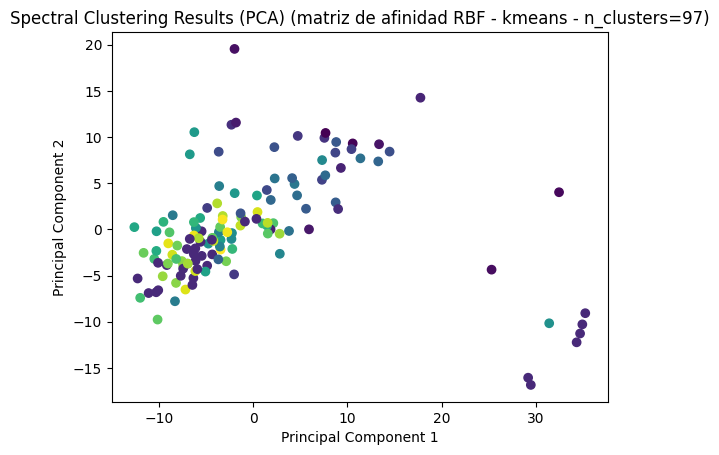

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_11)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_11)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

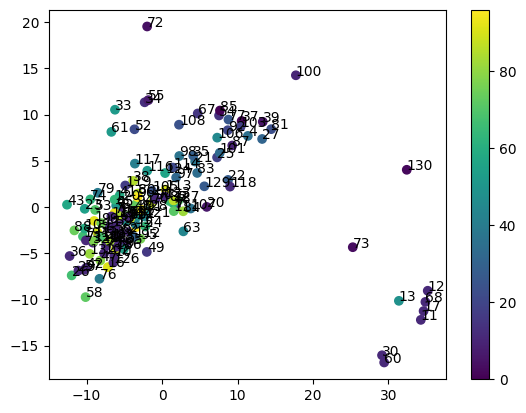

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_11):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_11)
silhouette_avg

-0.1018485048138343

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_11)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_11))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_11 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: -0.47326155970933376
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúster 25: 0.0
Índic

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering11.n_clusters):

    cluster_indices = np.where(labelsRBF_11 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 7: SI0 (Media: 3.806201550387597)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 10: SP1 (Media: 5.0)
- Atributo n. 7: SI0 (Media: 4.5)
- Atributo n. 2: V2 (Media: 4.0)
Cluster 3:
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 6: SA3 (Media: 5.0)
- Atributo n. 9: SI2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
Cluster 4:
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 10: SP1 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 6: SA3 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 6: SA3 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 

## B.2.3) Clustering12: matriz de afinidad RBF - kmeans - n_clusters=27

In [ ]:
n_clusters = 27
spectral_clustering12 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_12 = spectral_clustering12.fit_predict(affinity_matrix_rbf)
labelsRBF_12

array([ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,
        0,  0,  0, 24,  0, 26,  0, 21,  6,  0, 11,  0,  0,  0, 21,  0, 19,
       19, 17,  0, 22,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 23, 19,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  5,
        0,  0,  0,  0, 19,  0,  0,  0,  0,  3,  0,  0,  0,  2,  0,  0,  0,
       15,  0, 20,  0,  0,  0,  0,  8,  0,  0,  0,  0,  7, 12,  0, 18, 13,
        0,  1,  0,  0,  9,  0,  4,  0,  0,  0,  0,  0, 16,  0,  0,  0, 14,
       21,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_12
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels12_data_cleaned.csv", sep=";", index=False)

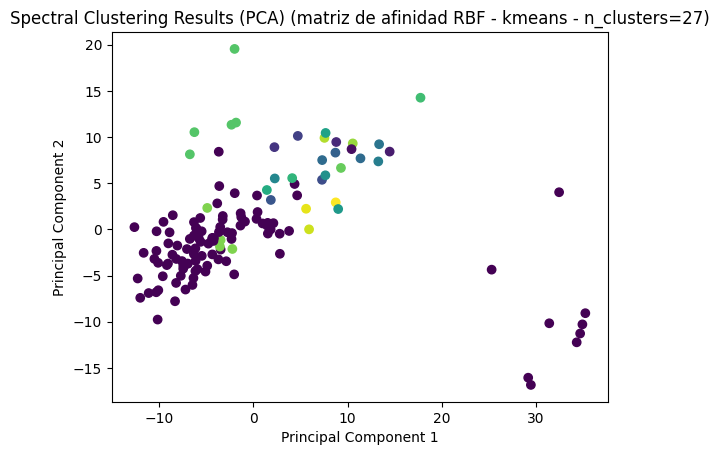

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

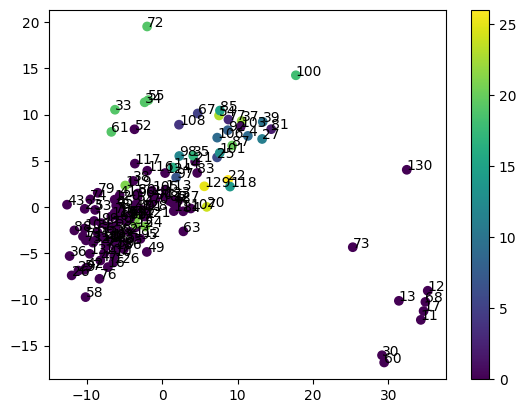

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_12):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_12)
silhouette_avg

-0.07201291338663389

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_12)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_12))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_12 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: -0.11054711369412505
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.04594378483920525
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.11484097859169354
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.17508857816479861
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24:

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering12.n_clusters):

    cluster_indices = np.where(labelsRBF_12 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 3.5)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 14: SF2 (Media: 3.0)
Cluster 4:
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 13: SF1 (Media: nan)
Cluster 6:
- Atributo n. 1: V1 (Med

In [ ]:
#13.Clustering13: matriz de afinidad RBF - kmeans - n_clusters=97 random_state=2
n_clusters = 97
spectral_clustering13 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=2)
labelsRBF_13 = spectral_clustering13.fit_predict(affinity_matrix_rbf)
labelsRBF_13

array([60, 84, 60, 47, 45, 65, 60,  8, 60, 60, 60, 60, 60, 46, 57, 60, 10,
       60, 64, 66,  6, 37, 27, 52, 69, 19, 59, 31, 71, 60, 60, 43, 60, 51,
       13, 29, 60,  1, 74,  5, 60, 67, 60, 70, 53, 50, 41, 76, 62,  0, 79,
       92, 22, 81, 14,  7, 60, 60, 63, 60, 60, 51, 60, 44, 83, 60, 64, 15,
       60, 87, 77, 60,  4,  3, 86, 60, 40, 26, 88, 39, 74, 23, 78, 32, 68,
       16, 58,  9, 61, 60, 60, 48, 20, 60, 89, 90, 77, 33, 24, 91, 11, 34,
       60, 17, 93, 25, 35, 36, 38, 96, 94, 82, 30, 73, 21, 60, 55, 42, 12,
       18, 72, 49, 60, 60, 56, 80, 60, 85, 75, 28,  2, 54, 95],
      dtype=int32)

In [ ]:
data_processed['Cluster']=labelsRBF_13
data_processed

In [ ]:
data_processed.to_csv("spectralClusteringLabels13_data_cleaned.csv", sep=";", index=False)

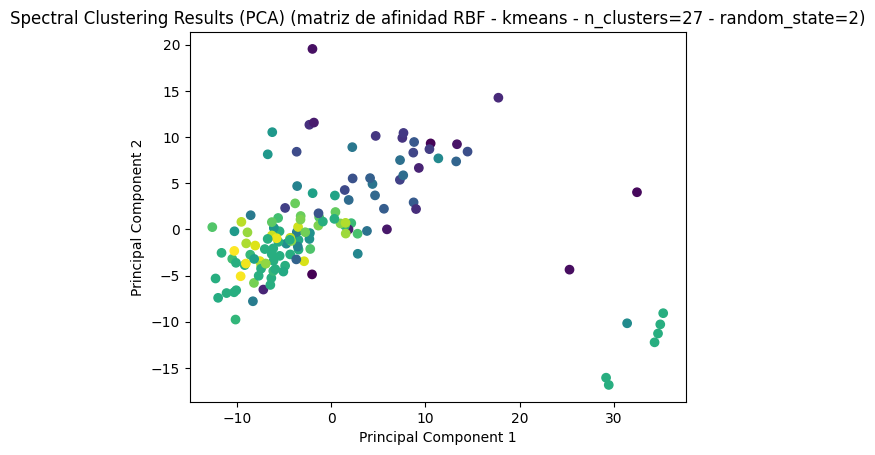

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_13)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_13)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

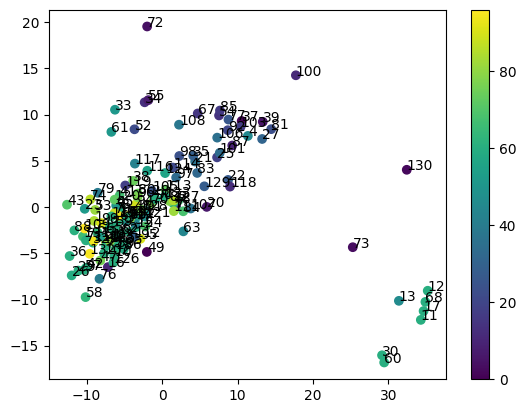

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_13):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, labelsRBF_13)
silhouette_avg

-0.10493204616839026

In [ ]:
# Calcular el índice de silueta para cada muestra

silhouette_values = silhouette_samples(data_processed, labelsRBF_13)


# Calcular el índice de silueta individual promedio para cada clúster

cluster_indices = sorted(set(labelsRBF_13))

for cluster_idx in cluster_indices:

    # Obtener las muestras pertenecientes al clúster actual

    cluster_samples = silhouette_values[labelsRBF_13 == cluster_idx]

    cluster_avg_silhouette = cluster_samples.mean()

    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.0
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0
Índice de Silueta del Clúster 9: 0.0
Índice de Silueta del Clúster 10: 0.0
Índice de Silueta del Clúster 11: 0.0
Índice de Silueta del Clúster 12: 0.0
Índice de Silueta del Clúster 13: 0.0
Índice de Silueta del Clúster 14: 0.0
Índice de Silueta del Clúster 15: 0.0
Índice de Silueta del Clúster 16: 0.0
Índice de Silueta del Clúster 17: 0.0
Índice de Silueta del Clúster 18: 0.0
Índice de Silueta del Clúster 19: 0.0
Índice de Silueta del Clúster 20: 0.0
Índice de Silueta del Clúster 21: 0.0
Índice de Silueta del Clúster 22: 0.0
Índice de Silueta del Clúster 23: 0.0
Índice de Silueta del Clúster 24: 0.0
Índice de Silueta del Clúster 25: 0.0
Índice de Silueta del 

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering13.n_clusters):

    cluster_indices = np.where(labelsRBF_13 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")

Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 2: V2 (Media: 4.170542635658915)
- Atributo n. 11: SP2 (Media: 2.131782945736434)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.5)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 10: SP1 (Media: 5.0)
- Atributo n. 7: SI0 (Media: 4.5)
- Atributo n. 2: V2 (Media: 4.0)
Cluster 3:
- Atributo n. 4: SA1 (Media: 5.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 6: SA3 (Media: 5.0)
- Atributo n. 9: SI2 (Media: 4.0)
- Atributo n. 5: SA2 (Media: 5.0)
Cluster 4:
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 10: SP1 (Media: 3.0)
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 6: SA3 (Media: 4.0)
- Atributo n. 15: SF3 (Media: 4.0)
Cluster 5:
- Atributo n. 1: V1 (Media: nan)
- Atributo n. 2: V2 (Media: nan)
- Atributo n. 4: SA1 (Media: nan)
- Atributo n. 6: SA3 (Media: nan)
- Atributo n. 3: V3 (Media: nan)
Cluster 6:
- Atributo n. 1: V1

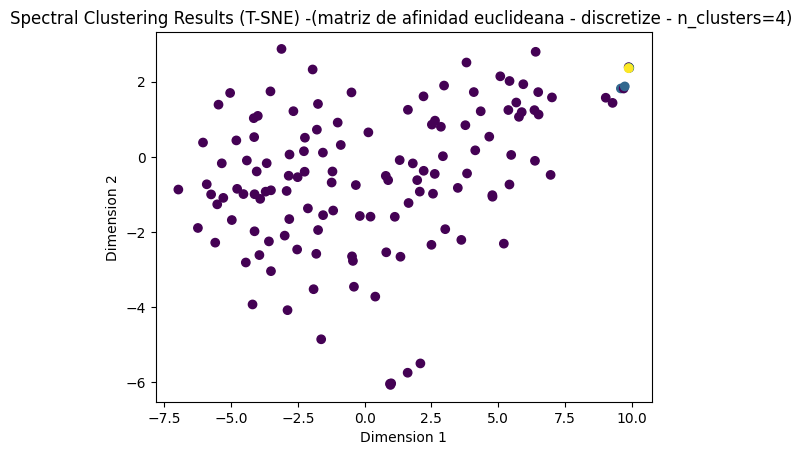

In [ ]:
#T-SNE (t-Distributed Stochastic Neighbor Embedding)

# Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualización en un gráfico de dispersión
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Spectral Clustering Results (T-SNE) -(matriz de afinidad euclideana - discretize - n_clusters=4) ')
plt.show()


# Gráfico radar
   * Si tus datos tienen características numéricas, puedes utilizar un gráfico de radar para visualizar las características promedio de cada clúster.
   * Cada clúster se representa como un polígono y la posición de los vértices del polígono corresponde a los valores promedio de las características en ese clúster.

## Gráfico radar: matriz de afinidad euclideana - discretize - n_clusters=4

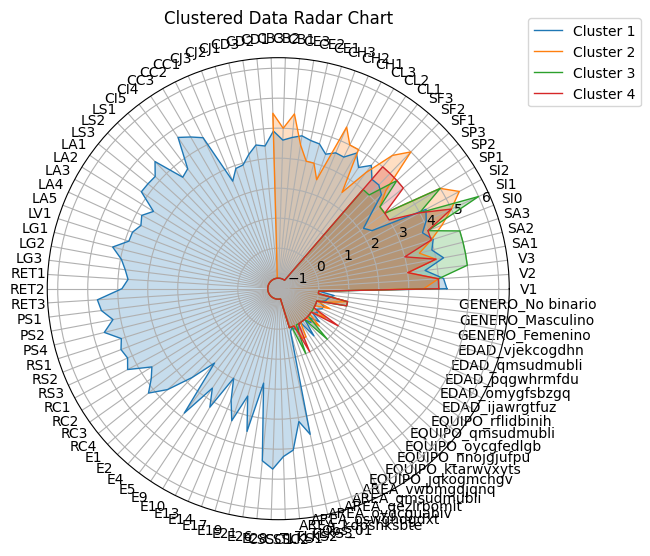

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels1).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()


## Gráfico radar:  matriz de afinidad euclideana - kmeans - n_clusters=4

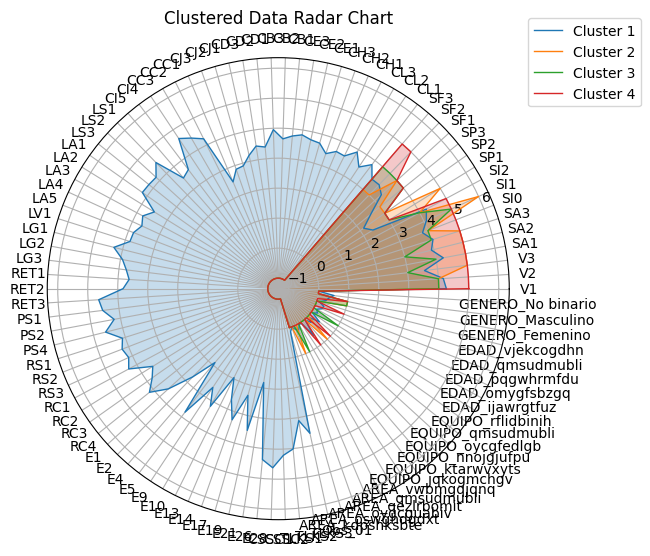

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels4).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

## Gráfico radar: matriz de afinidad RBF - kmeans - n_clusters=27

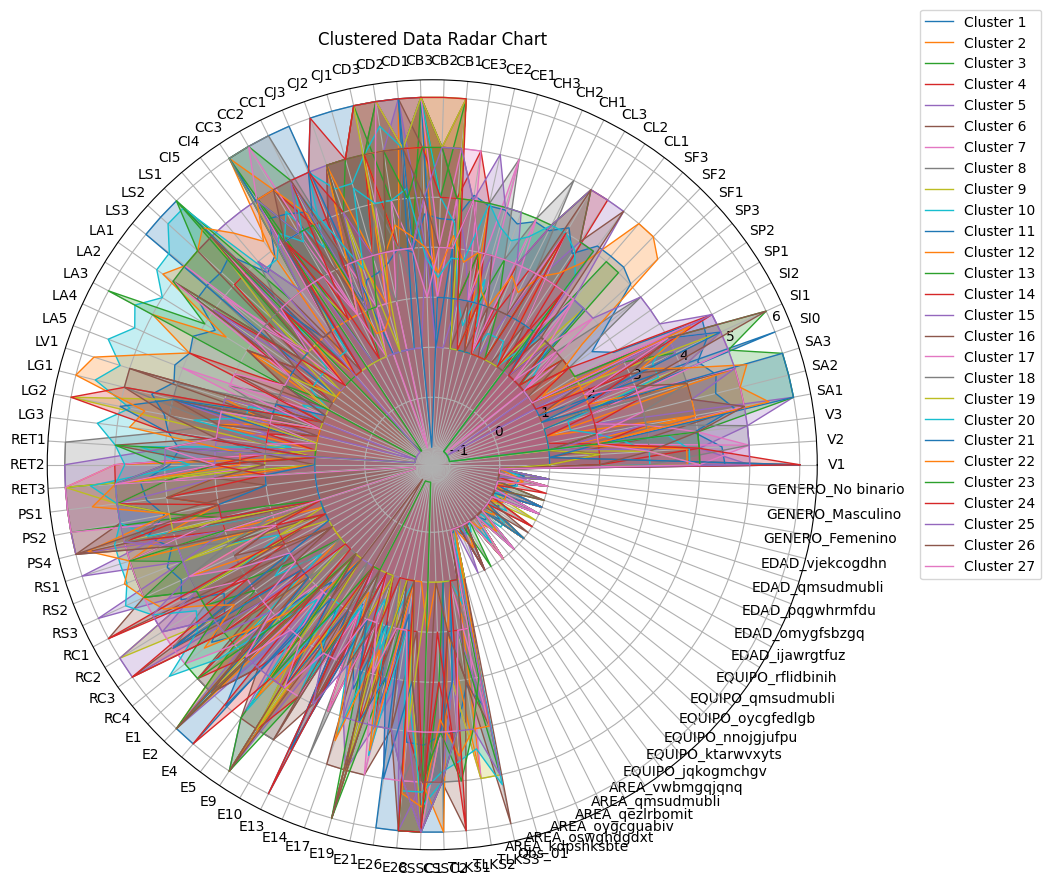

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labelsRBF_12).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

===============================================================================
# **Análisis con 7 y 9 clústers**

In [6]:
# Verificar el número de características
def verificar_caracteristicas(X, labels, n_clusters):
  num_features = X.shape[1]

  if num_features == 2:
      # Gráfico de dispersión en 2D
      plt.scatter(X[:, 0], X[:, 1], c=labels)
      plt.xlabel('Feature 1')
      plt.ylabel('Feature 2')
      plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters= %d)' %n_clusters)
      plt.show()

  elif num_features == 3:
      # Gráfico de dispersión en 3D
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
      ax.set_xlabel('Feature 1')
      ax.set_ylabel('Feature 2')
      ax.set_zlabel('Feature 3')
      ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters= %d)' %n_clusters)
      plt.show()

  else:
      # Aplicar PCA para reducir a 2 dimensiones
      pca = PCA(n_components=2)
      X_pca = pca.fit_transform(X)

      plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
      plt.xlabel('Principal Component 1')
      plt.ylabel('Principal Component 2')
      plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters= %d)' %n_clusters)
      plt.show()

In [7]:
# Calcular el índice de silueta para cada muestra
from sklearn.metrics import silhouette_score, silhouette_samples
def silhoutte_por_cluster (data_processed, labels):
  silhouette_values = silhouette_samples(data_processed, labels)
  # Calcular el índice de silueta individual promedio para cada clúster
  cluster_indices = sorted(set(labels))
  for cluster_idx in cluster_indices:
      # Obtener las muestras pertenecientes al clúster actual

      cluster_samples = silhouette_values[labels == cluster_idx]

      cluster_avg_silhouette = cluster_samples.mean()

      print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

> ## Matrices de afinidad

In [8]:
#distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

#RBF
affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)  #se recomienda probar diferentes valores de gamma en un rango amplio, como [0.001, 0.01, 0.1, 1, 10]

> ## Nº de clústeres

In [9]:
n_clusters7 = 7
n_clusters9 = 9

## A.1.4) Clustering14: matriz de afinidad euclideana - discretize - n_clusters=7

In [10]:
spectral_clustering14 = SpectralClustering(n_clusters=n_clusters7, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels14 = spectral_clustering14.fit_predict(affinity_matrix_euclidean)
labels14

array([5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 3, 5, 6, 1, 5, 5, 5, 4, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 3, 5, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 5, 1, 5, 0, 5, 3, 5,
       0, 5, 2, 5, 5, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 0,
       3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5,
       5])

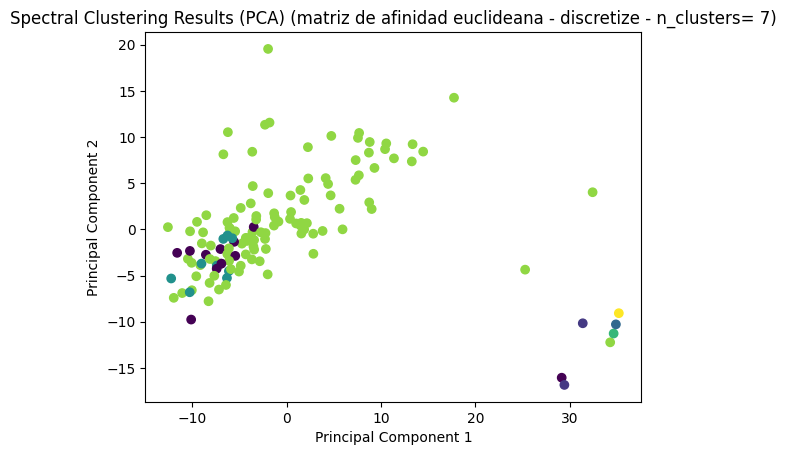

In [11]:
verificar_caracteristicas(X, labels14, n_clusters7)

In [12]:
silhoutte_por_cluster (data_processed, labels14)

Índice de Silueta del Clúster 0: -0.2612301463800205
Índice de Silueta del Clúster 1: 0.3000779594247799
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.15798586783637517
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: -0.15597658124123792
Índice de Silueta del Clúster 6: 0.0


## A.1.5) Clustering15: matriz de afinidad euclideana - discretize - n_clusters=9

In [13]:
spectral_clustering15 = SpectralClustering(n_clusters=n_clusters9, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels15 = spectral_clustering15.fit_predict(affinity_matrix_euclidean)
labels15

array([0, 4, 5, 1, 1, 1, 0, 1, 5, 1, 1, 6, 7, 4, 1, 1, 1, 2, 5, 1, 1, 1,
       1, 1, 0, 1, 7, 1, 1, 0, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1,
       1, 1, 1, 7, 1, 1, 1, 1, 1, 0, 1, 1, 1, 5, 0, 1, 1, 1, 4, 1, 4, 1,
       1, 1, 8, 4, 1, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 4,
       4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 5, 1, 1, 1, 1, 1,
       0])

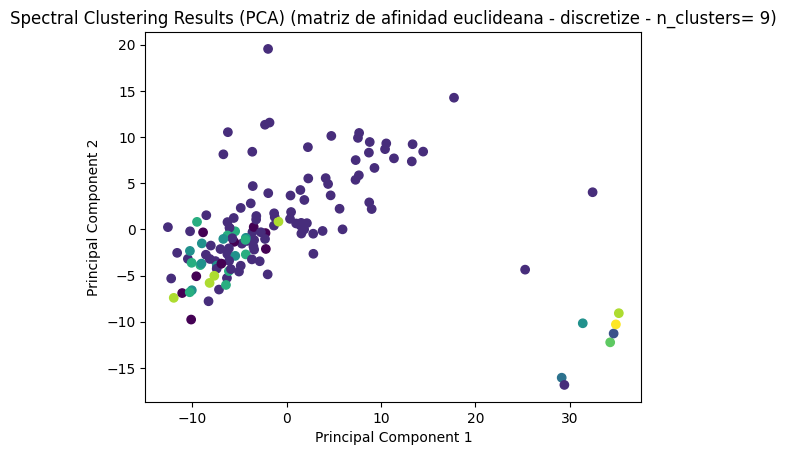

In [14]:
verificar_caracteristicas(X, labels15, n_clusters9)

In [15]:
silhoutte_por_cluster (data_processed, labels15)

Índice de Silueta del Clúster 0: -0.08520564781321342
Índice de Silueta del Clúster 1: -0.16587061524021066
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: -0.3343811974161327
Índice de Silueta del Clúster 5: 0.03247993133432689
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: -0.5353847080737605
Índice de Silueta del Clúster 8: 0.0


## A.2.4) Clustering16:  matriz de afinidad euclideana - kmeans - n_clusters=7

In [16]:
spectral_clustering16 = SpectralClustering(n_clusters=n_clusters7, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels16 = spectral_clustering16.fit_predict(affinity_matrix_euclidean)
labels16

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 5, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0], dtype=int32)

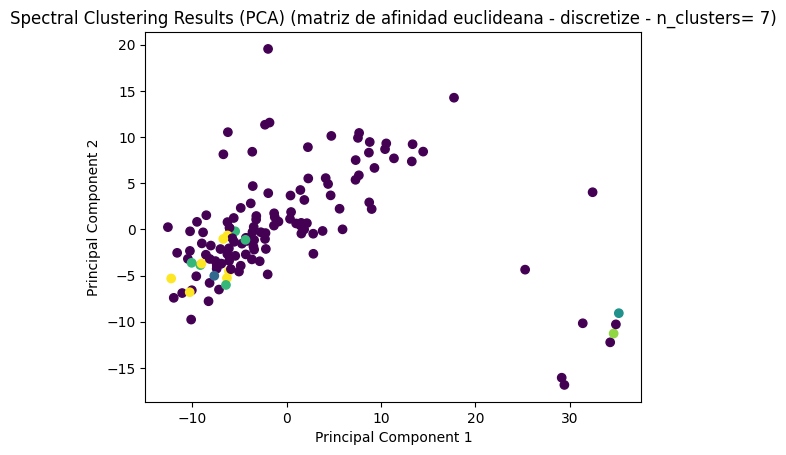

In [17]:
verificar_caracteristicas(X, labels16, n_clusters7)

In [18]:
silhoutte_por_cluster (data_processed, labels16)

Índice de Silueta del Clúster 0: -0.28683848793752104
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: -0.2732444205671357
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: -0.26287380415293965


## A.2.5) Clustering17:  matriz de afinidad euclideana - kmeans - n_clusters=9

In [19]:
spectral_clustering17 = SpectralClustering(n_clusters=n_clusters9, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels17 = spectral_clustering17.fit_predict(affinity_matrix_euclidean)
labels17

array([0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 4, 6, 0, 2, 0, 0, 0, 5, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 8, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0], dtype=int32)

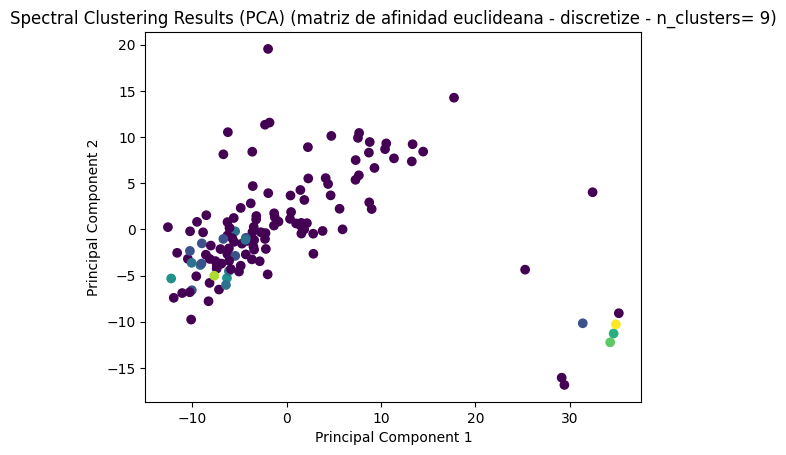

In [20]:
verificar_caracteristicas(X, labels17, n_clusters9)

In [21]:
silhoutte_por_cluster (data_processed, labels17)

Índice de Silueta del Clúster 0: -0.2651105510777741
Índice de Silueta del Clúster 1: 0.0
Índice de Silueta del Clúster 2: -0.44886673194354393
Índice de Silueta del Clúster 3: -0.2608056727567583
Índice de Silueta del Clúster 4: -0.27578453196704666
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: 0.0


## B.1.4) Clustering18: matriz de afinidad RBF - discretize - n_clusters=7

In [ ]:
spectral_clustering18 = SpectralClustering(n_clusters=n_clusters7, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_18 = spectral_clustering18.fit_predict(affinity_matrix_rbf)
labelsRBF_18

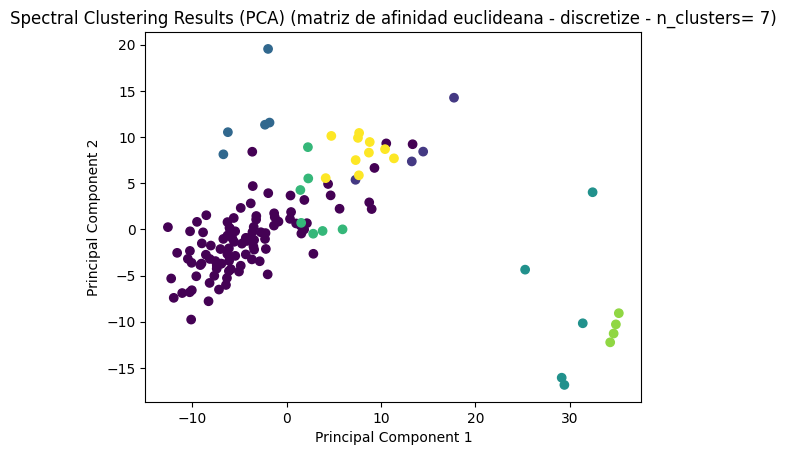

In [23]:
verificar_caracteristicas(X, labelsRBF_18, n_clusters7)

In [24]:
silhoutte_por_cluster (data_processed, labelsRBF_18)

Índice de Silueta del Clúster 0: 0.16708246315684497
Índice de Silueta del Clúster 1: 0.04854974794669564
Índice de Silueta del Clúster 2: 0.18878863147721067
Índice de Silueta del Clúster 3: 0.13401015985697776
Índice de Silueta del Clúster 4: 0.08606523356859468
Índice de Silueta del Clúster 5: 0.7282433642242887
Índice de Silueta del Clúster 6: 0.052754449747281676


## B.1.5) Clustering19: matriz de afinidad RBF - discretize - n_clusters=9

In [25]:
spectral_clustering19 = SpectralClustering(n_clusters=n_clusters9, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_19 = spectral_clustering19.fit_predict(affinity_matrix_rbf)
labelsRBF_19

array([0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 5, 5, 4, 0, 0, 0, 5, 0, 0, 6, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 4, 0, 0, 2, 2, 8, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 4, 2, 0, 6, 0, 0,
       0, 1, 5, 0, 0, 0, 2, 4, 0, 0, 0, 8, 0, 0, 0, 3, 0, 0, 6, 8, 0, 0,
       0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1, 0, 3, 8, 0, 8, 0, 0, 8, 6, 1, 0,
       0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0,
       0])

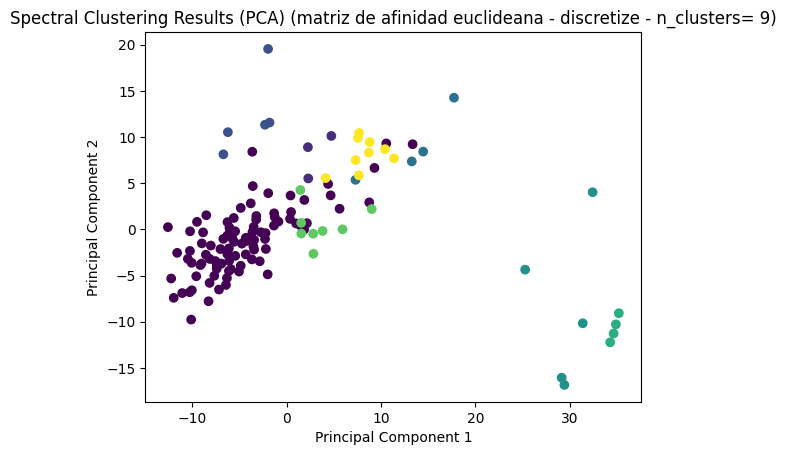

In [26]:
verificar_caracteristicas(X, labelsRBF_19, n_clusters9)

In [27]:
silhoutte_por_cluster (data_processed, labelsRBF_19)

Índice de Silueta del Clúster 0: 0.15310648268854554
Índice de Silueta del Clúster 1: 0.1390550259815706
Índice de Silueta del Clúster 2: 0.18394605707010842
Índice de Silueta del Clúster 3: 0.035485598404901064
Índice de Silueta del Clúster 4: 0.13401015985697776
Índice de Silueta del Clúster 5: 0.7282433642242887
Índice de Silueta del Clúster 6: 0.07468634854341605
Índice de Silueta del Clúster 8: 0.06930882343186855


## B.2.4) Clustering20: matriz de afinidad RBF - kmeans - n_clusters=7

In [28]:
spectral_clustering20 = SpectralClustering(n_clusters=n_clusters7, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_20 = spectral_clustering20.fit_predict(affinity_matrix_rbf)
labelsRBF_20

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 6, 6, 5, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

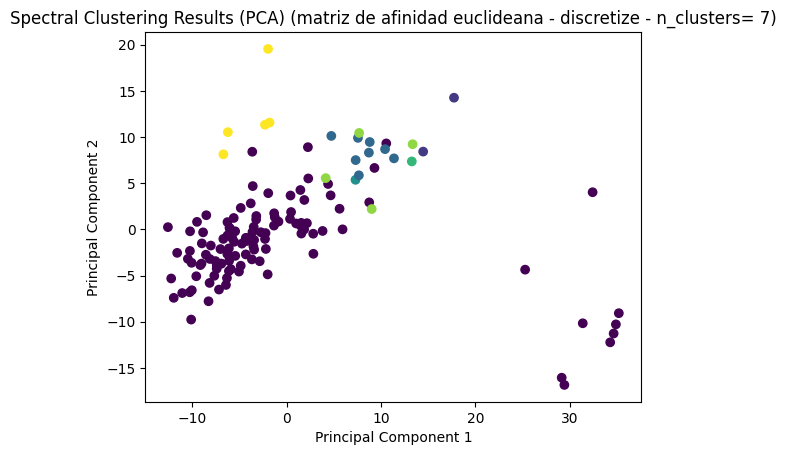

In [29]:
verificar_caracteristicas(X, labelsRBF_20, n_clusters7)

In [30]:
silhoutte_por_cluster (data_processed, labelsRBF_20)

Índice de Silueta del Clúster 0: 0.11165704102873557
Índice de Silueta del Clúster 1: -0.11014516647953607
Índice de Silueta del Clúster 2: -0.03257186446157101
Índice de Silueta del Clúster 3: 0.0
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: -0.17226887819460976
Índice de Silueta del Clúster 6: 0.21670886137283513


## B.2.5) Clustering21: matriz de afinidad RBF - kmeans - n_clusters=9

In [31]:
spectral_clustering21 = SpectralClustering(n_clusters=n_clusters9, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_21 = spectral_clustering21.fit_predict(affinity_matrix_rbf)
labelsRBF_21

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 7, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 8, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 1, 3, 0, 3, 0, 0, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

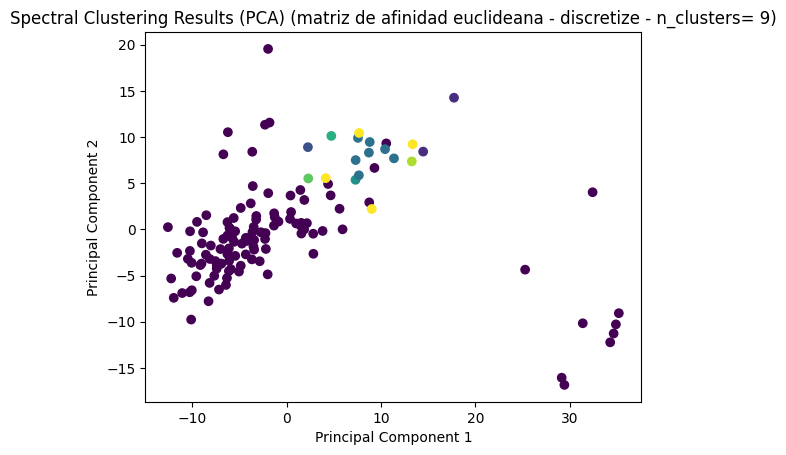

In [32]:
verificar_caracteristicas(X, labelsRBF_21, n_clusters9)

In [33]:
silhoutte_por_cluster (data_processed, labelsRBF_21)

Índice de Silueta del Clúster 0: 0.02836623707146855
Índice de Silueta del Clúster 1: -0.11014516647953607
Índice de Silueta del Clúster 2: 0.0
Índice de Silueta del Clúster 3: -0.0039112773158460875
Índice de Silueta del Clúster 4: 0.0
Índice de Silueta del Clúster 5: 0.0
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.0
Índice de Silueta del Clúster 8: -0.17800688188550096
